<h2>Learner 3: Perceptron</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import logisticClassify2 as lc
from importlib import reload

# Original data taken from txt files
x = np.genfromtxt("X_train.txt", delimiter = None)
y = np.genfromtxt("Y_train.txt", delimiter = None)
x_test = np.genfromtxt("X_test.txt", delimiter = None)

# Extract certain data out to be validation data
x_validation = x[10000:20000]
y_validation = y[10000:20000]

# Extract certain data out to be training data
x_train = x[0:10000]
y_train = y[0:10000]

In [9]:
%%writefile logisticClassify2.py

import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
import math


# Fix the required "not implemented" functions for the homework ("TODO")

################################################################################
## LOGISTIC REGRESSION BINARY CLASSIFIER #######################################
################################################################################


class logisticClassify2(ml.classifier):
    """A binary (2-class) logistic regression classifier

    Attributes:
        classes : a list of the possible class labels
        theta   : linear parameters of the classifier 
    """

    def __init__(self, *args, **kwargs):
        """
        Constructor for logisticClassify2 object.  

        Parameters: Same as "train" function; calls "train" if available

        Properties:
           classes : list of identifiers for each class
           theta   : linear coefficients of the classifier; numpy array 
        """

        self.classes = [0,1]              # (default to 0/1; replace during training)
        self.theta = np.array([])         # placeholder value before training
        
        if len(args) or len(kwargs):      # if we were given optional arguments,
            self.train(*args,**kwargs)    #  just pass them through to "train"

## METHODS ################################################################

    def plotBoundary(self,X,Y):
        """ Plot the (linear) decision boundary of the classifier, along with data """
        
        if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
            
        ## Put all values in a tuple
        ax = X.min(0),X.max(0); ax = (ax[0][0],ax[1][0],ax[0][1],ax[1][1]);

        x1b = np.array([ax[0],ax[1]]);  # at X1 = points in x1b
        x2b = (-self.theta[0] - (self.theta[1] * x1b)) / self.theta[2]    # TODO find x2 values as a function of x1's values
        
        ## Now plot the data and the resulting boundary:
        A = (Y == self.classes[0]);                                              # and plot it:
        plt.plot(X[A,0],X[A,1],'b.',X[~A,0],X[~A,1],'r.',x1b,x2b,'k'); 
        plt.axis(ax);
        plt.xlim([190, 260])
        plt.ylim([100, 350])
#         plt.show();
#         plt.draw();

    def predictSoft(self, X):
        """ Return the probability of each class under logistic regression """
        raise NotImplementedError
        ## You do not need to implement this function.
        ## If you *want* to, it should return an Mx2 numpy array "P", with 
        ## P[:,1] = probability of class 1 = sigma( theta*X )
        ## P[:,0] = 1 - P[:,1] = probability of class 0 
        return P

    def predict(self, X):
        """ Return the predictied class of each data point in X"""
        # raise NotImplementedError
        ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2] + ... for each i
        ## TODO: if z[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
        ##       else predict class 0:  Yhat[i] = self.classes[0]
        Yhat = np.zeros(X.shape[0])
        r = []

        for feature1, feature2 in X:
            linear_response = self.theta[0] + (self.theta[1] * feature1) + (self.theta[2] * feature2)
            r.append(linear_response)

        for i in range(len(r)):
            if (r[i] > 0):
                Yhat[i] = self.classes[1]
            else:
                Yhat[i] = self.classes[0]

        return Yhat



    def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
        """ Train the logistic regression using stochastic gradient descent """
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M, 1)),X))   # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1

        if len(self.theta)!=N+1:
            self.theta=np.random.rand(N+1);

        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];
        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            Jsur = 0

            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                alpha = 0.5
                sigma = 1 / (1 + np.exp(-(XX[i].dot(np.transpose(self.theta)))))
                if (sigma == 1):
                    sigma = 0.001
                    
                Jsur += (-(YY[i]) * (np.log(sigma)) - ((1 - YY[i]) * np.log(1 - sigma)))
                Jsur += ((alpha) * sum(self.theta**2))

                gradient = (-YY[i] * XX[i]) + (sigma * XX[i])
                # gradient += ((2 * alpha) * (sum(self.theta)))
                gradient += ((2 * alpha) * (YY[i]*XX[i]) * (XX[i].dot(np.transpose(XX[i]) + alpha))**-1)
                self.theta -= stepsize * gradient

            J01.append( self.err(X,Y) )  # evaluate the current error rate 
            # Jsur += ((alpha) * sum(self.theta**2))
            Jsur /= M
            Jnll.append( Jsur )

            plt.figure(1); 
            plt.plot(Jnll,'b-',J01,'r-'); 
            plt.draw();    # plot losses
            if N==2: 
                plt.figure(2); 
                self.plotBoundary(X,Y); 
                plt.draw();
            plt.pause(0.01)

            ## For debugging: you may want to print current parameters & losses
            print (self.theta, ' => ', Jnll[-1], ' / ', J01[-1] )

            if (epoch != 1):
                done =  (epoch >= stopEpochs) or (np.absolute(Jnll[-1] - Jnll[-2]) < stopTol)
            


################################################################################
################################################################################
################################################################################



Overwriting logisticClassify2.py


In [3]:
reload(lc)

learner = lc.logisticClassify2()
learner.classes = np.unique(y_train)

w_vector = np.array([1, 0.45, -0.48])
learner.theta = w_vector

learner.plotBoundary(x_train[0:500, 0:2], y_train[0:500])

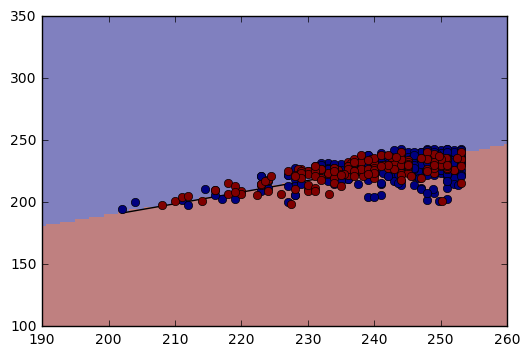

In [4]:
reload(lc)

ml.plotClassify2D(learner, x_train[0:500, 0:2], y_train[0:500])
plt.show()

In [10]:
reload(lc)

learner.train(x_train[0:500, 0:2], y_train[0:500], stopEpochs = 3)


C:\Users\Huy\Desktop\UCI\2016-2017\Winter 2017\CS 178\Project\logisticClassify2.py:113: RuntimeWarning: overflow encountered in exp
  sigma = 1 / (1 + np.exp(-(XX[i].dot(np.transpose(self.theta)))))
C:\Users\Huy\Desktop\UCI\2016-2017\Winter 2017\CS 178\Project\logisticClassify2.py:115: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Huy\Desktop\UCI\2016-2017\Winter 2017\CS 178\Project\logisticClassify2.py:115: RuntimeWarning: invalid value encountered in multiply
  


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
2.22933802232e-284
0.0
1.42415634181e-263
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.